In [1]:
# import necessary libraries
import os

from aqi_functions_city import fetch_city_data, clean_city_data, plot_city_data, \
                                train_RandomForestRegressor_model, city_predict_and_plot

In [2]:
%matplotlib inline

**Create Directories**

In [3]:
# change csv output as per user preferences
csv_output_directory = 'csv'

# Create csv output directory if it doesn't exist
if not os.path.exists(csv_output_directory):
    os.makedirs(csv_output_directory)
    
# change directory output as per user preferences
image_output_directory = 'img'

# Create image output directory if it doesn't exist
if not os.path.exists(image_output_directory):
    os.makedirs(image_output_directory)

**Assign Variables for analysis**



**Fetch city data**

In [4]:
# Assign variables
city = 'Melbourne'
start_date = '2021-01-01'
end_date = '2023-12-31'
limit = 12000

# fetch retries
retries = 3

df = fetch_city_data(city, start_date, end_date, limit, retries)

Fetching city data...


**Here's a breakdown of the data queried from OpenAQ API. You can find the raw data in csv directory after running this notebook**

1. **Index (0)**: 
    
    Row index of dataset.

2. **SPARTAN - Melbourne**: 
    
    Were the measurement was taken, in this case a monitoring station in Melbourne.

3. **pm25**: *(parameter)*
    
    This indicates the pollutant being measured, specifically particulate matter with a diameter of 2.5 micrometers or smaller (PM2.5). PM2.5 is a measure of fine inhalable particles, about 20 - 30 times smaller than the diameter of the hair on your head. 

    These tiny particles are small enough to penetrate deep into the lungs, and even enter the bloodstream, causing various health problems, especially for people with pre-existing respiratory and cardiovascular conditions. 
    
    Long-term exposure to high levels of PM2.5 has been linked to increased risks of respiratory and cardiovascular diseases, as well as premature death.

4. **1.5**: *(value)*
    
    This is the measured concentration of PM2.5 in the units specified later (µg/m³).

5. **{'utc': '2023-06-19T17:00:00+00:00', 'local': '2023-06-20T03:00:00+10:00'}**: 
    
    Timestamps indicating when the measurement was recorded in both UTC (Coordinated Universal Time) and local time (UTC+10:00, which corresponds AEST).

6. **µg/m³**: *(unit)*
    
    Unit of measurement for PM2.5 concentration, micrograms per cubic meter.

7. **{'latitude': -37.7968, 'longitude': 144.963}**: 

    The geographical coordinates (latitude and longitude) of the measurement location in Melbourne, Australia.

8. **AU**: 
    
    Country code (ISO 3166-1 alpha-2 code) for Australia.

**Clean city data**

In [5]:
clean_df = clean_city_data(df)

Cleaning city data...


Cleans DataFrame containing air quality measurement data.

See below for more info:

- Select relevant columns for visualisations, training and prediction model 
    - date: AEST, 
    - value: float, 
    - unit: µg/m³ (micrograms per cubic meter)
    - parameter: PM25
- Normalize 'date' column
- Convert dates and assign
- Pivot table pivots the DataFrame data so that:
    - Each unique 'date' becomes an index - AEST
    - Each unique 'parameter' becomes a column - PM2.5
    - The 'value' associated with each combination of 'date' and 'parameter' is placed in the corresponding cell of the pivoted DataFrame.
- Resample to daily averages
- Drop NaN values
- Returns a DataFrame

**Basic Plotting of city AQI data**

Plotting city data...
Plot saved to img/Melbourne_aqi_daily_averages_130724_1612.png


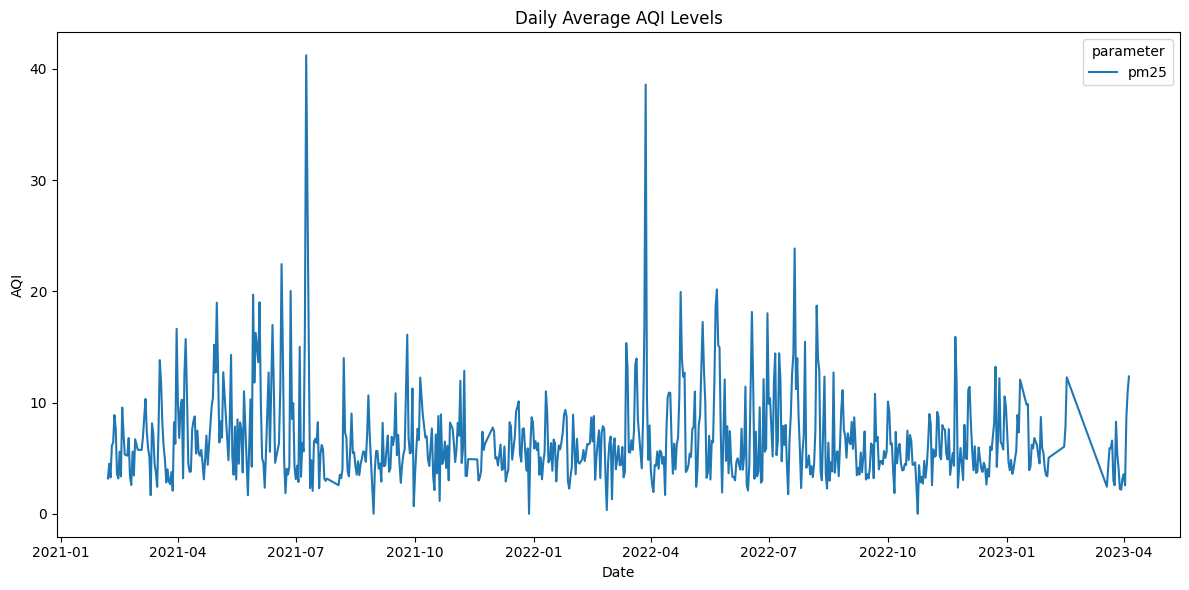

In [6]:
plot_city_data(clean_df, city, image_output_directory)

plot_city_data generates and saves plotted data to designated directories

**Training the model**

In [7]:
model = train_RandomForestRegressor_model(clean_df)

Training Random Forest Regressor model for city data...
Mean Squared Error: 34.093


Trains Random Forest Regressor model to predict PM2.5 levels based on day of the year.

Args:
- data: DataFrame containing time-series data with 'pm25' values and a datetime index.

Returns: model 
Trained RandomForestRegressor model.

Prints:
- Mean Squared Error (MSE) of the model on test data.

Note:
- The 'day_of_year' feature is extracted from the datetime index for modeling.

**Predict and Plot Dataset**

Running prediction and plot for city data...
Plot saved to img/Melbourne_aqi_prediction_130724_1612.png


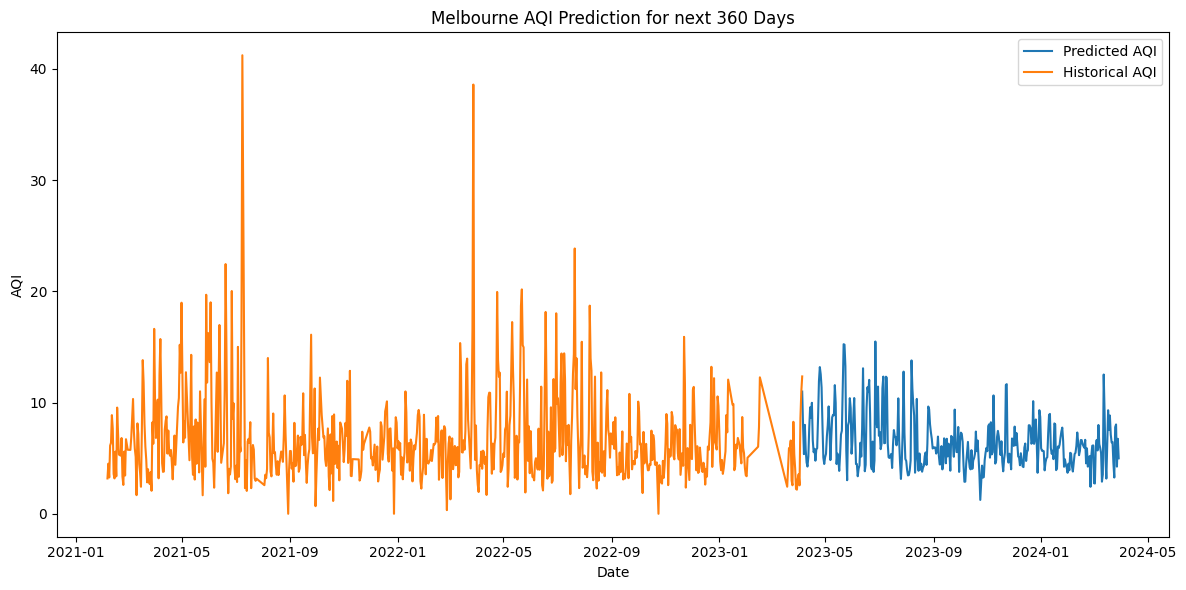

In [8]:
days = 360 # in days

city_predict_and_plot(model, 
                      clean_df, 
                      city, 
                      image_output_directory, 
                      days
                      )